# Probando el ajuste de distribuciones hipotéticas


A veces, el conocimiento específico sugiere fuertes razones que justifiquen alguna suposición; de lo contrario, esto debería probarse de alguna manera. Cuando comprobamos si los datos experimentales se ajustan a una distribución de probabilidad dada, no estamos realmente probando una hipótesis sobre un parámetro o dos; de hecho, estamos ejecutando una prueba no paramétrica.
En esta sección ilustramos tres tipos de enfoque:
- La prueba de chi-cuadrado, que es de propósito general y, en términos generales, verifica el ajuste en términos de histogramas y densidades.

In [1]:
import numpy as np
import scipy.stats as st     # Librería estadística
import matplotlib.pyplot as plt

Una trama Q-Q es generalmente un enfoque más poderoso para hacer esto que la técnica común de comparación de histogramas de las dos muestras, pero requiere más habilidad para interpretar. Los diagramas Q-Q se usan comúnmente para comparar un conjunto de datos con un modelo teórico

## Interpretación 

- Si las dos distribuciones que se comparan son idénticas, la gráfica Q-Q sigue la línea de 45° $y = x$
- Si las dos distribuciones concuerdan después de transformar linealmente los valores en una de las distribuciones, entonces la gráfica Q – Q sigue alguna línea, pero no necesariamente la línea y = x
- Si la tendencia general de la gráfica Q-Q es más plana que la línea y = x, la distribución representada en el eje horizontal está más dispersa que la distribución representada en el eje vertical. 
- A la inversa, si la tendencia general de la gráfica Q-Q es más pronunciada que la línea y = x, la distribución representada en el eje vertical está más dispersa que la distribución representada en el eje horizontal.

> Referencia: https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

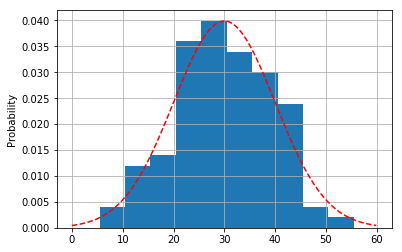

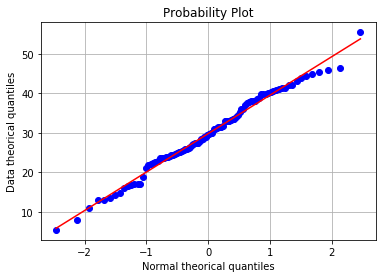

In [13]:
# Creo variables aleatorias normales
mu = 30; sigma = 10
measurements = np.random.normal(loc = mu, scale = sigma, size=100)   

# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
plt.hist(measurements,divisiones,density=True)
x = np.arange(0,60,.1)
y = st.norm.pdf(x,loc = mu, scale = sigma)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(measurements, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

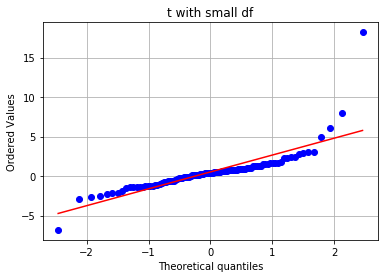

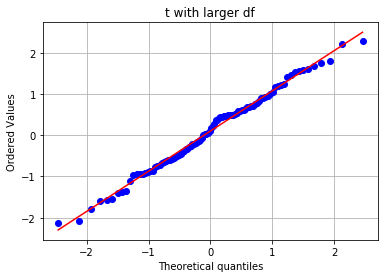

In [100]:
######## t-student
nsample = 100
#A t distribution with small degrees of freedom:
x = st.t.rvs(3, size=nsample)
res = st.probplot(x, plot=plt)
plt.title('t with small df')
plt.grid()
plt.show()

#A t distribution with larger degrees of freedom:
x = st.t.rvs(25, size=nsample)
res = st.probplot(x, plot=plt)
plt.title('t with larger df')
plt.grid()
plt.show()

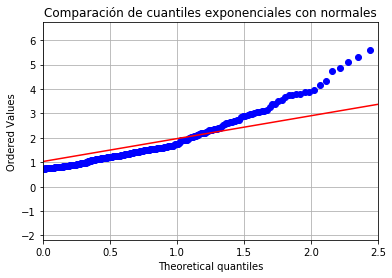

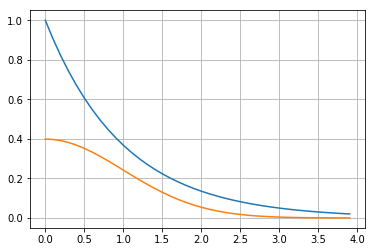

In [18]:
########### Ajustando una exponencial
nsample = 500
# Distribución exponencial con parámetro lambda = 0.7
lamb = 1
x = st.expon.rvs(loc=0,scale=1/lamb, size=nsample)
res = st.probplot(x, plot=plt, dist='norm')
plt.title('Comparación de cuantiles exponenciales con normales')
plt.xlim([0,2.5])
plt.grid()
plt.show()

x1 = np.arange(0,4,0.1)
y_exp = st.expon.pdf(x1,loc=0,scale=1/lamb)
y_norm = st.norm.pdf(x1)
plt.plot(x1,y_exp,x1,y_norm)
plt.grid()
plt.show()

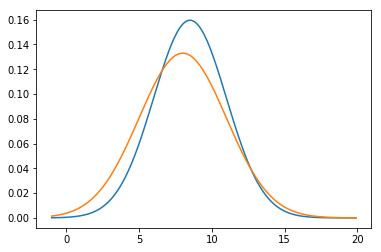

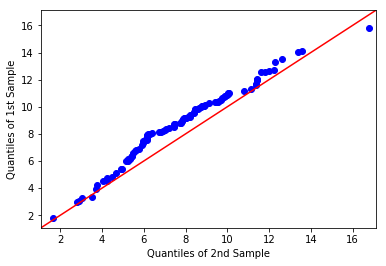

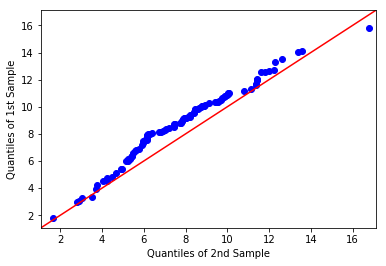

In [20]:
import statsmodels.graphics.gofplots as qs
np.random.seed(5555)
# Comparación de dos conjuntos de datos
x = np.random.normal(loc=8.5, scale=2.5, size=100)
y = np.random.normal(loc=8.0, scale=3.0, size=100)

# Gráfica de las dos normales
x1 = np.arange(-1,20,.1)
y1 = st.norm.pdf(x1,loc=8.5, scale=2.5)
y2 = st.norm.pdf(x1,loc=8.0, scale=3.0)
plt.plot(x1,y1,x1,y2)
plt.show()

qs.qqplot_2samples(x, y,line='45')

# La prueba chi cuadrado - Usando el histograma

$$\chi^2 = \sum_{j=1}^J{(O_j-E_j)^2\over E_j}$$
El estadístico anterior, tiene (aproximadamente) una distribución de chi-cuadrado. Deberíamos rechazar la hipótesis si $\chi^2$ es demasiado grande, es decir, si $\chi^2>\chi^2_{1-\alpha,m}$ donde:

- $\chi^2_{1-\alpha,m}$ es un cuantil de la distribución de chi-cuadrado.
- $\alpha$ es el nivel de significancia de la prueba.
- m es el número de grados de libertad.

Lo que nos falta aquí es m, que depende del número de parámetros de la distribución que hemos estimado utilizando los datos. Si no se ha estimado ningún parámetro, es decir, si hemos asumido una distribución parametrizada específica antes de observar datos, los grados de libertad son $J - 1$; si tenemos parámetros p estimados, deberíamos usar $J - p - 1$, con $J$ la cantidad de particiones del histograma.

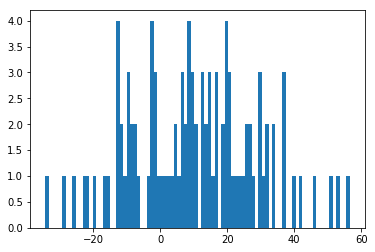

Valor de chi cuadrado teorico  =  94.8079093931982
Valor de chi cuadrado librería =  94.8079093931982
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  10.682741365706983 
Desviación estándar muestral =  26.18193710642433


In [66]:
np.random.seed(555)

N = 100 # Cantidad de muestras
n1 = np.random.normal(10,20,N)
J = 90  # Cantidad de particiones del histograma
[freq,x,p]=plt.hist(n1,J,density=False)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=mu,scale=sigma)
Ei = n*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mu,'\nDesviación estándar muestral = ',sigma)

# Pruebas de correlación de Pearson

El análisis de correlación juega un papel importante en los modelos de Monte Carlo:
- En el análisis de entrada, debemos verificar si algunas variables están correlacionadas para modelarlas correctamente.
- Al aplicar la reducción de varianza por el método de números complementarios, puede ser importante verificar la fuerza de la correlación entre el estimador de Monte Carlo crudo y la variable de control que consideramos.

Está claro que la magnitud de la correlación se debe comparar con el tamaño de la muestra, y una estrategia simple es probar la hipótesis nula
$$ H_0: \rho_{XY}=0$$
contra la hipótesis alternativa
$$ H_a: \rho_{XY}\neq0$$

Sin embargo, necesitamos una estadística cuya distribución bajo la hipótesis nula sea bastante manejable. Un resultado útil es que, si la muestra es normal, la estadística

$$T=R_{XY}\sqrt{{n-2 \over 1-R_{XY}^2}}$$

se distribuye aproximadamente como una variable t con n - 2 grados de libertad, para una muestra adecuadamente grande. Esto puede ser explotado para llegar a las pruebas de correlación.

Entonces, si tenemos un conjunto de datos ${x_1, ..., x_n}$ que contiene n valores y otro conjunto de datos ${y_1, ..., y_n}$ que contiene n valores, entonces la fórmula para $R_{XY}$ es:

$$R_{XY}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}$$ 
Donde:
- n  es el tamaño de la muestra
- $x_{i},y_{i}$ son las muestras individuales indexadas con i.
- ${\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}$ la media muestral; y análogamente para $\bar {y}$.
- Puede ser probado que $-1\leq R_{XY} \leq 1$, justo como su contraparte  probabilistica $\rho_{XY}$




In [33]:
np.random.seed(5555)
N = 100
Z = np.random.normal(size=N)
x1 = np.random.normal(10,5,N)
x2 = np.random.normal(30,8,N)

# Comando que estima el valor del coeficiente de correlación de pearson 
corr = st.pearsonr(x1+50*Z,x2+50*Z)
corr2 = st.pearsonr(x1,x2)

Rxy = corr[0]
print('Rxy  = ',corr[0],', p-value  = ',corr[1])
print('Rxy2 = ',corr2[0],',p-value2 = ',corr2[1])

# Cálculo del p-value 
T = Rxy*np.sqrt((N-2)/(1-Rxy**2))
p_val = st.t.pdf(T,df=N-2)
print(p_val)

Rxy  =  0.985548386904 , p-value  =  2.20524193169e-77
Rxy2 =  -0.0990366294477 ,p-value2 =  0.326924440995
1.82282024391e-77


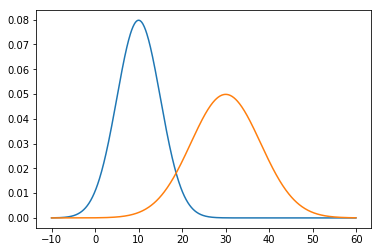

In [72]:
x = np.arange(-10,60,.1)
y1 = st.norm.pdf(x,10,5)
y2 = st.norm.pdf(x,30,8)
plt.plot(x,y1,x,y2);

# Estimación de parámetros

Ilustremos a tráves de un ejemplo como usando el método montecarlos podemos estimar parámetros de interés de alguna distribución en particular.

### Ejemplo
Considere una variable aleatoria $X\sim U[a,b]$. Recordemos que
$$E(X)={a+b\over 2},\quad Var(X)={(b-a)^2\over 12}$$

Claramente, la media de la muestra $\bar X$ y la varianza muestral $S^2$ no nos proporcionan estimaciones directas de los parámetros a y b. Sin embargo, podríamos considerar la siguiente forma de transformar las estadísticas de muestra en estimaciones de parámetros. Si sustituimos $\mu$ y $\sigma^2$ con sus estimaciones, encontramos
$$\begin{split}a+b&=2\bar X \\ -a+b&=2\sqrt 3 S\end{split}$$

Resolviendo este sistemas de ecuaciones obtenemos los siguientes estimados

$$\hat a = \bar X -\sqrt 3 S,\quad \hat b = \bar X+ \sqrt 3 S$$

In [38]:
# Solución ejemplo 
a= 5; b=10    # Parámetros reales
N = 10;       # Cantidad de términos
X = np.random.uniform(a,b,N)
media = np.mean(X)
std = np.std(X)

# estimaciones
a_hat = media-np.sqrt(3)*std
b_hat = media+np.sqrt(3)*std
print('Estimación de a = ',a_hat)
print('Estimación de b = ',b_hat)

Estimación de a =  4.66591853352
Estimación de b =  9.56006069181


# Método de máxima verosimilitud

El método de máxima verosimilitud es un enfoque alternativo para encontrar estimadores de forma sistemática. Imagine que una variable aleatoria X tiene un PDF caracterizado por un único parámetro $\theta$, denotado por $f_x(x;\theta)$. Si extraemos una muestra de n i.i.d. variables de esta distribución, la densidad conjunta es solo el producto de PDF's individuales:

$$f_{X_1,\cdots,X_n}(x_1,\cdots,x_n;\theta)=f_X(x_1;\theta)\cdot f_X(x_2;\theta)\cdots f_X(x_n;\theta)=\prod_{i=1}^{n}f_X(x_i;\theta)$$

Si nosotros estamos interesados en estimar $\theta$ dada una muestra $X_i=x_i,i=1,\cdots,n$, podemos construir la función  verosimilitud

$$L(\theta)=L(\theta;x_1,\cdots,x_n)=f_{X_1,\cdots,X_n}(x_1,\cdots,x_n;\theta)$$

Esta notación es usada para enfatizar que la función depende del parámetros desconocido $\theta$, para una muestra de observaciones dada. El acrónimo para referirse a este método es MLE 'maximum-likelihood estimator'

La intuición sugiere que deberíamos seleccionar el parámetro $\theta$ que produzca el mayor valor de la función de probabilidad. Por lo tanto lo que debemos de hacer es encontrar el $\theta$ que maximice la expresión anterior y para ellos podemos hacer uso de la derivada para encontrar los puntos críticos de la función $L(\theta)$. Ilustremos el método con el siguiente ejemplo.

### Ejemplo: MLE para la función de distribución exponencial

La PDF de una V.A exponencial esta dada por:
$$f_X(x;\lambda)=\lambda e^{-\lambda x}$$

Encuentre la función de máxima verosimilitud para demostrar que la condición de optimalidad de primer orden conduce a 

$$\hat \lambda = {1\over {1\over n}\sum_{i=1}^nX_i}={1 \over \bar X}$$

### Forma de utilizar este método en python

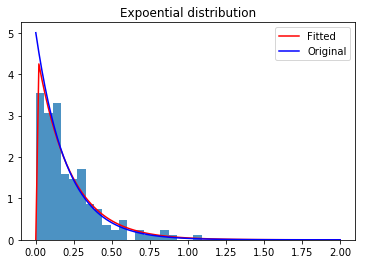

Lambda fitted =  4.638254084


In [77]:
################ Adjusting a exponential distribution 
np.random.seed(5555)
# picking 150 of from a exponential distrubution
# with lambda = 5
samp = st.expon.rvs(loc=0,scale=1/5,size=150) 

param = st.expon.fit(samp) # distribution fitting
# now, param[0] and param[1]=1/lambda are the location and scale
# of the fitted distribution
x = np.linspace(0,2,100)
# fitted distribution
pdf_fitted = st.expon.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = st.expon.pdf(x,loc=0,scale=1/5)

plt.title('Expoential distribution')
plt.plot(x,pdf_fitted,'r-',label='Fitted')
plt.plot(x,pdf,'b-',label='Original')
plt.legend()
plt.hist(samp,20,normed=1,alpha=.8,)
plt.show()
print('Lambda fitted = ',1/param[1])

# <font color = red> Tarea

Demostrar **Teoricamente** usando el MLE, que los estimadores de máxima verosimilitud para los parámetros $\mu$ y $\sigma$ de una distribución normal, estan dados por:

$$\hat \mu = {1\over n}\sum_{i=1}^n x_i,\quad \hat  \sigma^2={1\over n}\sum_{i=1}^n (x_i-\hat \mu)^2$$

**Recuerde que:** La distribución normal es
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

### Forma de utilizar este método en python

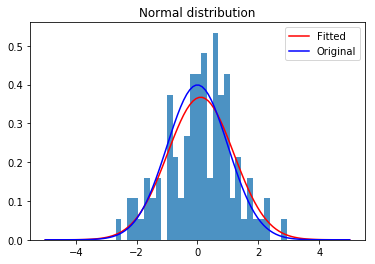

Media encontrada usando MLE= 0.10523376316228233 , 
Std encontrada usando MLE= 1.0862813838532221
Media obtenida usando la media muestral= 0.10523376316228233 , 
Std obtenida usando la std muestral= 1.0862813838532221


In [79]:
################ Adjusting a normal distribution 
np.random.seed(5555)
# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = st.norm.rvs(loc=0,scale=1,size=100) 

param = st.norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(-5,5,100)
# fitted distribution
pdf_fitted = st.norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = st.norm.pdf(x)

plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-',label='Fitted')
plt.plot(x,pdf,'b-',label='Original')
plt.legend()
plt.hist(samp,30,density=1,alpha=.8,)
plt.show()

print('Media encontrada usando MLE=',param[0],', \nStd encontrada usando MLE=',param[1])

# Parameters obtained theoricaly
sigma_hat = np.std(samp)
mu_hat = np.mean(samp)
print('Media obtenida usando la media muestral=',mu_hat,', \nStd obtenida usando la std muestral=',sigma_hat)


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>